<a href="https://colab.research.google.com/github/SARU230/UV-VIS-plots-from-Gaussian/blob/main/TD_DFT_spectrum_from_nm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracted excitations: [(333.08262598044485, 1.0865), (303.4232999730834, 0.0), (287.00381900243025, 0.0282), (269.92903478601596, 0.5699), (265.54168361993277, 0.0), (265.18391787852863, 0.07), (260.13804099272033, 0.0), (258.7808084813323, 0.3386), (257.5820523473203, 0.0), (253.81749703197283, 0.105), (246.17339342081755, 0.0), (234.63962003519595, 0.227), (233.49527360373594, 0.1977), (231.9230913103655, 0.0), (231.3173898444204, 0.0), (230.04285475762018, 0.0837), (225.61042174593356, 0.0182), (225.5816914988448, 0.0005), (223.29869802452686, 0.0), (220.19782288281567, 0.2563), (218.48295304378468, 0.0), (216.39733342640747, 0.1094), (214.91212866997122, 0.0078), (214.89723059859276, 0.1375), (212.60544544269942, 0.144), (212.44881525519557, 0.0004), (212.21611815645807, 0.0002), (211.98393025044876, 0.1099), (210.89152692268442, 0.0), (209.6471503203882, 0.8347), (376.67071688942895, 1.2914), (328.99973467763334, 0.0), (305.16316385293106, 0.0266), (289.7196261682243, 0.5314), (2

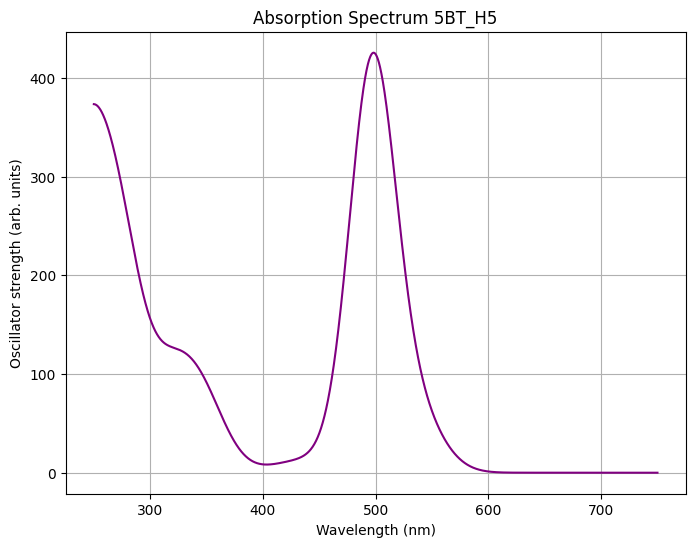

In [14]:
import re
import numpy as np
import matplotlib.pyplot as plt

def extract_singlet_excitations(logfile):
    """
    Extract singlet excitation energies and oscillator strengths from a Gaussian TDDFT log file.

    Parameters:
    logfile (str): Path to the log file.

    Returns:
    excitations (list of tuples): Each tuple contains (energy in nm, oscillator strength) for singlet excitations.
    """
    excitations = []

    with open(logfile, 'r') as file:
        lines = file.readlines()

        # Regex to find excitation energy and oscillator strength in Gaussian output
        energy_pattern = re.compile(r"Excited State\s+\d+:\s+Singlet.*?([\d\.]+)\s+eV.*?f=([\d\.]+)")

        for i, line in enumerate(lines):
            # Search for excitation energy and oscillator strength on the same line
            match = energy_pattern.search(line)
            if match:
                energy_ev = float(match.group(1))  # Excitation energy in eV
                osc_strength = float(match.group(2))  # Oscillator strength (f-value)

                # Convert energy from eV to wavelength in nm
                wavelength_nm = 1240.0 / energy_ev

                excitations.append((wavelength_nm, osc_strength))

    return excitations


def gaussian_broadening(wavelength, osc_strength, x, width=20):
    """
    Apply Gaussian broadening to an excitation in wavelength space.

    Parameters:
    wavelength (float): Excitation wavelength in nm.
    osc_strength (float): Oscillator strength.
    x (numpy array): Array of wavelength values over which the spectrum is calculated.
    width (float): Width of the Gaussian (broadening factor, in nm).

    Returns:
    numpy array: The broadened Gaussian contribution to the spectrum.
    """
    return osc_strength * np.exp(-(x - wavelength) ** 2 / (2 * width ** 2))


def plot_uv_vis_spectrum(excitations, width=20, xrange=(200, 800), num_points=1000):
    """
    Plot the UV-Vis absorption spectrum using Gaussian broadening with wavelength in nm.

    Parameters:
    excitations (list of tuples): List containing (wavelength in nm, oscillator strength).
    width (float): Broadening factor for Gaussian peaks (in nm).
    xrange (tuple): Wavelength range (in nm) for the spectrum.
    num_points (int): Number of points in the spectrum.
    """
    # Create wavelength grid
    x = np.linspace(xrange[0], xrange[1], num_points)
    spectrum = np.zeros_like(x)

    # Sum Gaussian broadened contributions from all excitations
    for wavelength, osc_strength in excitations:
        spectrum += gaussian_broadening(wavelength, osc_strength, x, width=width)


    plt.figure(figsize=(8, 6))
    plt.plot(x, spectrum, color='purple')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Oscillator strength (arb. units)')
    plt.title('Absorption Spectrum 5BT_H5')
    plt.grid(True)
    #plt.gca().invert_xaxis()  # Invert x-axis to match typical UV-Vis spectrum display
    plt.show()



logfile = '2BT_F3_TD.log'

excitations = extract_singlet_excitations(logfile)


print(f"Extracted excitations: {excitations}")

plot_uv_vis_spectrum(excitations, width=20, xrange=(250, 750), num_points=2000)



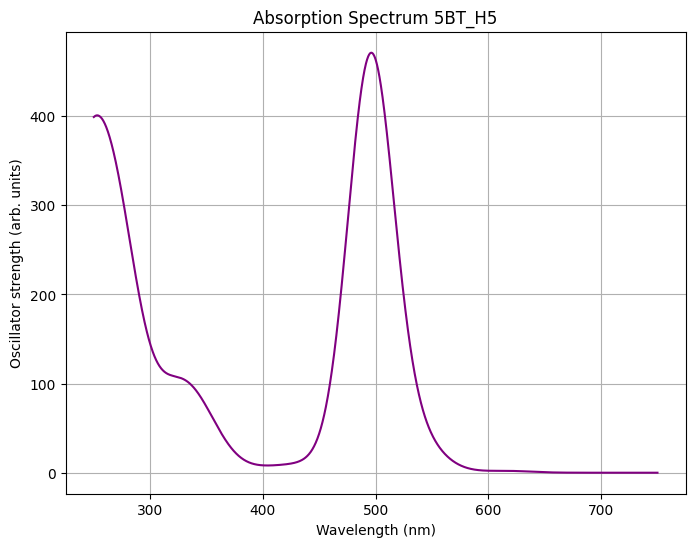

In [13]:
plot_uv_vis_spectrum(excitations2, width=20, xrange=(250, 750), num_points=2000)